In [27]:
# To run:
# $ jupyter notebook

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as scipy
# Plot the figures inline and not in a pop-up
%matplotlib inline

In [29]:
"""
Calculates the annual payment amount.
Args:
  * principal: the principal amount of the loan.
  * interest_rate: the annual interest rate on the loan.
  * term_in_years: the number of years until the loan is paid.
Returns:
  * the annual payment amount.
"""
def GetAnnualPayment(principal, interest_rate, term_in_years):
    annual_payment = (
        (principal * ((1.0 + interest_rate)**term_in_years) * interest_rate) /
        (((1.0 + interest_rate)**term_in_years) - 1.0))
    return annual_payment

In [30]:
"""
Calculates the monthly payment amount.
Args:
  * principal: the principal amount of the loan.
  * interest_rate: the monthly interest rate on the loan.
  * term_in_months: the number of months until the loan is paid.
Returns:
  * the monthly payment amount.
"""
def GetMonthlyPayment(principal, interest_rate, term_in_months):
    annual_payment = GetAnnualPayment(principal, 12.0 * interest_rate,
                                      term_in_months / 12.0)
    return annual_payment / 12.0

In [31]:
"""
Calculates the debt total after a number of years.
Args:
  * principal: the principal amount of the loan.
  * interest_rate: the annual interest rate on the loan.
  * payment: the amount paid each year.
  * year: the number of years that have passed since loan issue.
Returns:
  * the amount of remaining debt after a specified number of years.
"""
def CalculateDebtAtYear(principal, interest_rate, payment, year):
    z = (1.0 + interest_rate)
    debt = (principal * (z**year)) - payment * ((z**year - 1) / (z - 1))
    return debt

In [32]:
"""
Calculates the debt total after a number of months.
Args:
  * principal: the principal amount of the loan.
  * interest_rate: the annual interest rate on the loan.
  * payment: the amount paid each month.
  * month: the number of months that have passed since loan issue.
Returns:
  * the amount of remaining debt after a specified number of months.
"""
def CalculateDebtAtMonth(principal, interest_rate, payment, month):
    return CalculateDebtAtYear(principal, 12.0 * interest_rate,
                               12.0 * payment, month / 12.0)

In [33]:
"""
Calculates the total value of the property at a specified number of years
following the purchase, assuming some initial value and annual
appreciation rate.
Args:
  * initial_value: the initial value of the property.
  * appreciation_rate: the annual rate of increase in property value.
  * num_years: the number of years since the initial purchase.
Returns:
  * property value after num_years.
"""
def GetPropertyValueAtYear(initial_value, appreciation_rate, num_years):
    return initial_value * (1.0 + appreciation_rate)**num_years

In [34]:
"""
Calculates the total value of the property at a specified number of
months following the purchase, assuming some initial value and annual
appreciation rate.
Args:
  * initial_value: the initial value of the property.
  * appreciation_rate: the monthly rate of increase in property value.
  * num_months: the number of months since the initial purchase.
Returns:
  * property value after num_months.
"""
def GetPropertyValueAtMonth(initial_value, appreciation_rate, num_months):
    return GetPropertyValueAtYear(initial_value, 12.0 * appreciation_rate,
                                  num_months / 12.0)

In [35]:
"""
Calculates the total equity after a number of month.
Args:
  * principal: the principal amount of the loan.
  * interest_rate: the monthly interest rate on the loan.
  * payment: the amount paid each month.
  * initial_property_value: the property value at purchase.
  * appreciation_rate: the monthly rate of appreciation (fractional).
  * month: the number of months that have passed since loan issue.
Returns:
  * the amount of equity in a property after a specified number of months.
"""
def CalculateEquityAtMonth(principal, interest_rate, payment,
                           initial_property_value, appreciation_rate,
                           month):
    property_value = GetPropertyValueAtMonth(
        initial_property_value, appreciation_rate, month)
    remaining_debt = CalculateDebtAtMonth(principal, interest_rate,
                                          payment, month)
    return property_value - remaining_debt

In [36]:
"""
Calculates the equity, debt, value, and payment.
Args:
  * initial_property_value: the property value at purchase.
  * principal_loan_amount: the principal amount of the loan.
  * annual_interest_rate: the annual interest rate on the loan.
  * mortgage_term_years: the term of the mortgage in years.
  * annual_appreciation_rate: the annual rate of appreciation.
Returns:
  * the amount of debt, equity, property value, and payment size.
"""
def CalculateAll(initial_property_value, principal_loan_amount,
                 annual_interest_rate, mortgage_term_years,
                 annual_appreciation_rate):
    monthly_interest_rate = annual_interest_rate / 12.0
    months_until_paid_off = mortgage_term_years * 12.0
    monthly_appreciation_rate = annual_appreciation_rate / 12.0
    monthly_payment_amount = GetMonthlyPayment(
        principal_loan_amount, monthly_interest_rate,
        months_until_paid_off)
    print("Monthly payment:", monthly_payment_amount)

    months = list(range(int(months_until_paid_off)))
    debts = [
        CalculateDebtAtMonth(
            principal_loan_amount, monthly_interest_rate,
            monthly_payment_amount, month)
        for month in months]
    equities = [
        CalculateEquityAtMonth(
            principal_loan_amount, monthly_interest_rate,
            monthly_payment_amount, initial_property_value,
            annual_appreciation_rate / 12.0, month)
        for month in months]
    payments = [monthly_payment_amount] * len(months)
    values = [
        GetPropertyValueAtMonth(
            initial_property_value, monthly_appreciation_rate, month)
        for month in months]

    return months, debts, equities, payments, values

In [48]:
"""
Plots and calculates the equity, debt, value, and payment.
Args:
  * initial_property_value: the property value at purchase.
  * principal_loan_amount: the principal amount of the loan.
  * annual_interest_rate: the annual interest rate on the loan.
  * mortgage_term_years: the term of the mortgage in years.
  * annual_appreciation_rate: the annual rate of appreciation.
Returns:
  * A plot of the amount of debt, equity, property value, and payment size.
"""
def PlotAndGetValues(initial_property_value, principal_loan_amount,
                     annual_interest_rate, mortgage_term_years,
                     annual_appreciation_rate):
    months, debts, equities, payments, values = CalculateAll(
        initial_property_value, principal_loan_amount,
        annual_interest_rate, mortgage_term_years,
        annual_appreciation_rate)
    
    # Then plot the values.
    fig, ax = plt.subplots(figsize=(10,5))
    ax.plot(months, debts, label='Debt', color='r')
    ax.plot(months, values, label='Property value', color='b')
    ax.plot(months, equities, label='Equity', color='g')
    ax.fill_between(months, scipy.zeros(len(debts)), debts,
                    facecolor='r', alpha=0.3)
    ax.fill_between(months, scipy.zeros(len(values)), values,
                    facecolor='b', alpha=0.15)
    ax.fill_between(months, scipy.zeros(len(equities)), equities,
                    facecolor='g', alpha=0.3)
    ax.legend(loc='upper left')
    ax.set(xlabel='Months', ylabel='Value [$]', title='Equity vs. Debt')
    ax.grid()
    plt.show()

    return months, debts, equities, payments, values

Monthly payment: 1115.2822253848265


//anaconda/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


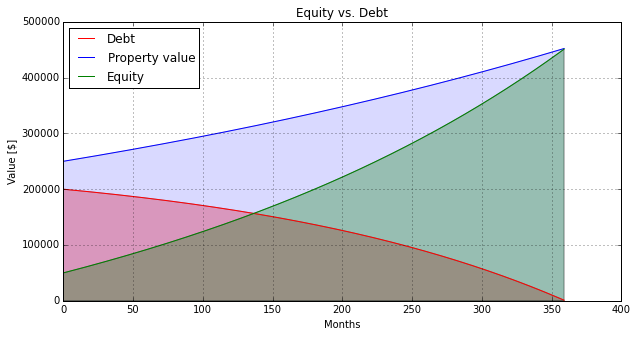

In [49]:
# Property-related parameters:
initial_property_value_ = 250000.0
annual_appreciation_rate_ = 0.02

# Mortgage-related parameters:
principal_loan_amount_ = 200000.0
annual_interest_rate_ = 0.0525
mortgage_term_years_ = 30.0

months, debts, equities, payments, property_values = PlotAndGetValues(
    initial_property_value_, principal_loan_amount_,
    annual_interest_rate_, mortgage_term_years_,
    annual_appreciation_rate_)